Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Initial work with Lists

In [2]:
x = [1, 2, 3, 4, 5]
x

[1, 2, 3, 4, 5]

In [3]:
type( x )

list

In [4]:
len(x)

5

In [5]:
x[1]

2

Plotting a Line

In [6]:
y = [1, 4, 9, 16, 25]

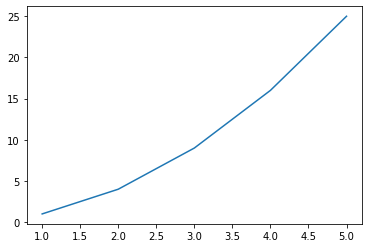

In [7]:

fig, ax = plt.subplots()
ax.plot( x, y )
plt.show()

Plot Multiple Series

In [8]:
x2 = [2, 4, 6]
y2 = [8, 64, 216]

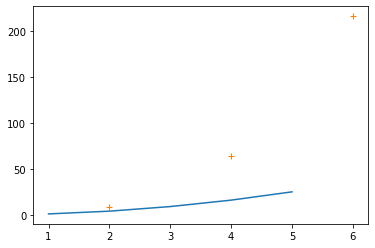

In [9]:
fig, ax = plt.subplots()
ax.plot( x, y )
ax.plot( x2, y2, '+' )
plt.show()

Annotate Plot

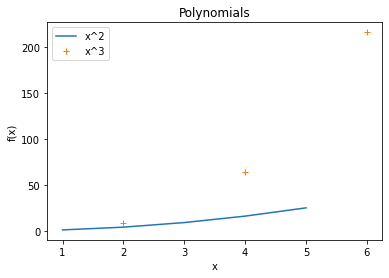

In [10]:

fig, ax = plt.subplots()
ax.plot( x, y, label="x^2" )
ax.plot( x2, y2, '+', label="x^3" )
ax.set_title( "Polynomials" )
ax.set_xlabel( "x" )
ax.set_ylabel( "f(x)" )
ax.legend()
plt.show()


## Exercise 1: Modify X and Y Axes to Share Scale

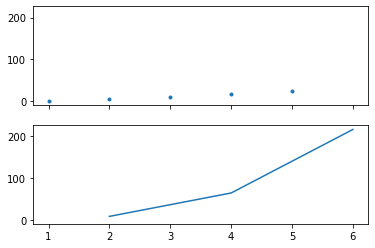

In [11]:
fig, ax = plt.subplots( nrows=2, sharex = True, sharey = True)
ax[0].plot( x, y, '.' )
ax[1].plot( x2, y2 )
plt.show()

## Exercise 2: Tidy K4 Chromosome Distributions

In [12]:
bed_columns = ["chr", "start", "end"]
bed_columns

['chr', 'start', 'end']

In [13]:
df_k4 = pd.read_table("../../qbb2020/data/K4me3.bed", names=bed_columns)
df_k4

,chr,start,end
0,3L,15823270,15830715
1,2R,11451787,11459612
2,3R,21665759,21673392
3,2R,20324929,20331038
4,3R,19859679,19864278
...,...,...,...
3825,3R,565835,566082
3826,2L,10439373,10442085
3827,3R,4477321,4479529
3828,3L,711347,711871


In [14]:
df_k4.shape

(3830, 3)

In [15]:
df_k4.loc[:,"width"] = df_k4.loc[:,"end"] - df_k4.loc[:,"start"]
df_k4

,chr,start,end,width
0,3L,15823270,15830715,7445
1,2R,11451787,11459612,7825
2,3R,21665759,21673392,7633
3,2R,20324929,20331038,6109
4,3R,19859679,19864278,4599
...,...,...,...,...
3825,3R,565835,566082,247
3826,2L,10439373,10442085,2712
3827,3R,4477321,4479529,2208
3828,3L,711347,711871,524


Plotting Length Distribution

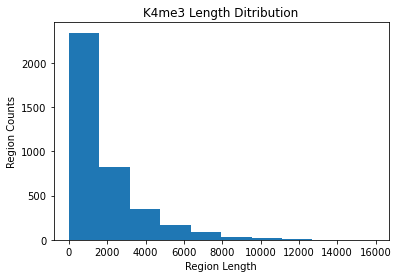

In [21]:
fig,ax = plt.subplots()
ax.hist(df_k4.loc[:, "width"])
ax.set_title("K4me3 Length Ditribution")
ax.set_ylabel("Region Counts")
ax.set_xlabel("Region Length")
plt.show()

Plotting Region Counts

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64
2L                     713
2R                     799
3L                     773
3R                     897
4                       65
X                      580
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64


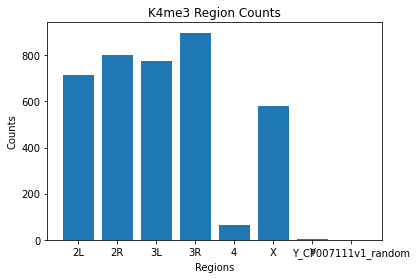

In [17]:
#grabbing the chr column from the pandas dataframe
chr_k4_regions= pd.Index(df_k4.loc[:, "chr"])

#counting up the number of chromosome regions as a series
chr_k4 = chr_k4_regions.value_counts()
print(chr_k4)

#sort the chromosome index
sorted_chr_k4 = chr_k4.sort_index()

print(sorted_chr_k4)

#bar plot of number of regions
fig, ax = plt.subplots()
ax.bar(sorted_chr_k4.index, sorted_chr_k4)
ax.set_title("K4me3 Region Counts")
ax.set_ylabel("Counts")
ax.set_xlabel("Regions")
plt.show()


## Exercise 3: Plotting Chromosome Distributions Together

Grabbing different bed files

In [18]:
df_k9 = pd.read_table("../../qbb2020/data/K9me3.bed", names=bed_columns)

df_k27 = pd.read_table("../../qbb2020/data/K27me3.bed", names=bed_columns)

df_k9.loc[:,"width"] = df_k9.loc[:,"end"] - df_k9.loc[:,"start"]
print(df_k9)

df_k27.loc[:,"width"] = df_k27.loc[:,"end"] - df_k27.loc[:,"start"]
print(df_k27)

    chr     start       end    width
0    2L      5031     13131     8100
1    2L    356567    382831    26264
2    2L    582167    609431    27264
3    2L    975967    996567    20600
4    2L   1667067   1687931    20864
..   ..       ...       ...      ...
291   X  22708532  22720332    11800
292   X  22865032  22882596    17564
293   X  22981432  23009896    28464
294   X  23156000  23204164    48164
295   Y    650514   1655192  1004678

[296 rows x 4 columns]
    chr     start       end   width
0    2L      5037      9637    4600
1    2L    322173    326237    4064
2    2L    365873    398837   32964
3    2L    498973    547373   48400
4    2L    579973    608037   28064
..   ..       ...       ...     ...
426   X  20310691  20388555   77864
427   X  20534591  20759055  224464
428   X  20824191  20835255   11064
429   X  20924791  20953755   28964
430   X  21464155  21496991   32836

[431 rows x 4 columns]


Putting all plots into the same figure

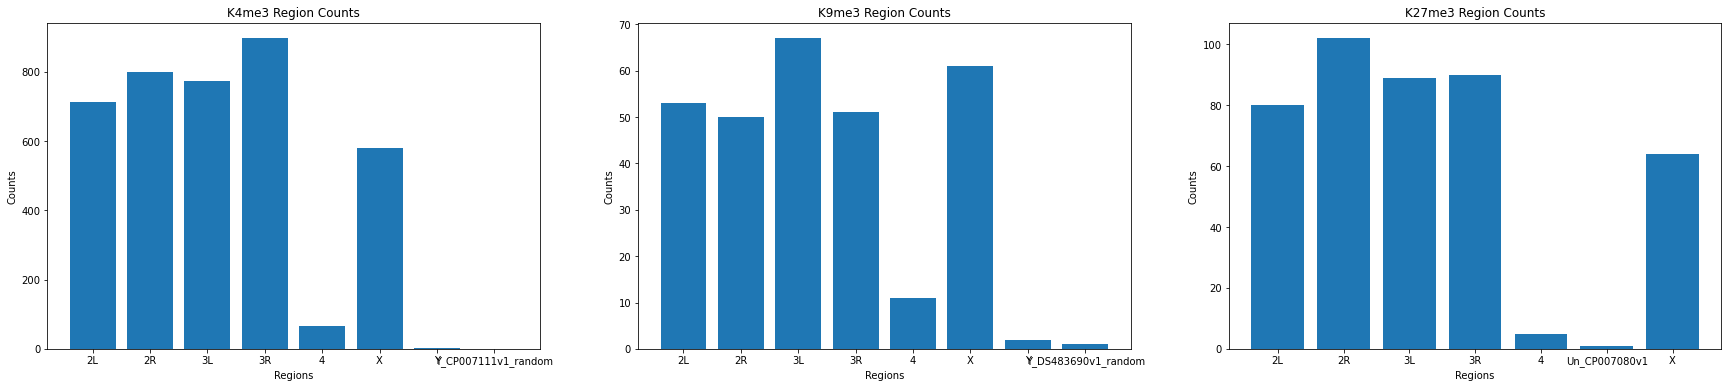

In [19]:

fig1,(ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (30, 6))

#K4me3
chr_k4_regions= pd.Index(df_k4.loc[:, "chr"])

chr_k4 = chr_k4_regions.value_counts()

sorted_chr_k4 = chr_k4.sort_index()

ax1.bar(sorted_chr_k4.index, sorted_chr_k4)
ax1.set_title("K4me3 Region Counts")
ax1.set_ylabel("Counts")
ax1.set_xlabel("Regions")

#K9me3
chr_k9_regions= pd.Index(df_k9.loc[:, "chr"])

chr_k9 = chr_k9_regions.value_counts()

sorted_chr_k9 = chr_k9.sort_index()

ax2.bar(sorted_chr_k9.index, sorted_chr_k9)
ax2.set_title("K9me3 Region Counts")
ax2.set_ylabel("Counts")
ax2.set_xlabel("Regions")

#K27me3
chr_k27_regions= pd.Index(df_k27.loc[:, "chr"])

chr_k27 = chr_k27_regions.value_counts()

sorted_chr_k27 = chr_k27.sort_index()

ax3.bar(sorted_chr_k27.index, sorted_chr_k27)
ax3.set_title("K27me3 Region Counts")
ax3.set_ylabel("Counts")
ax3.set_xlabel("Regions")

plt.show()

## Exercise 4: Plotting Width Distributions Together

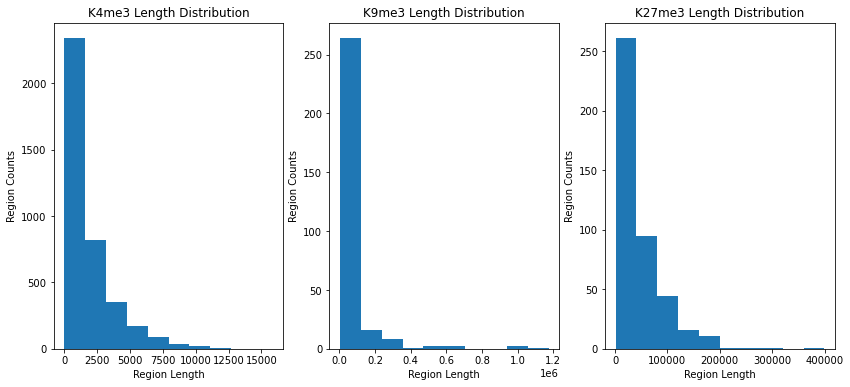

In [20]:
fig,(ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (14, 6))
ax1.hist(df_k4.loc[:, "width"])
ax1.set_title("K4me3 Length Distribution")
ax1.set_ylabel("Region Counts")
ax1.set_xlabel("Region Length")

ax2.hist(df_k9.loc[:, "width"])
ax2.set_title("K9me3 Length Distribution")
ax2.set_ylabel("Region Counts")
ax2.set_xlabel("Region Length")

ax3.hist(df_k27.loc[:, "width"])
ax3.set_title("K27me3 Length Distribution")
ax3.set_ylabel("Region Counts")
ax3.set_xlabel("Region Length")

plt.show()